**HR SALARY PREDICTION**

# Step1 : Business Problem Understanding

**"Predict the salary of employees based on their qualifications, experience, and job details."**
- A company wants to understand what factors affect employee salaries. By analyzing this data, they can:
    - Make fair and competitive salary offers
    - Improve employee retention
    - Identify potential salary gaps based on experience, role, or education

# Step2 : Data Understanding

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Data**

In [30]:
df=pd.read_csv("C:\\Users\\Asus\\OneDrive\\Desktop\\power shheets\\hr_salary_prediction_dataset.csv")
df.head()

,EmployeeID,Age,Gender,Education,JobRole,Department,ExperienceYears,PerformanceRating,CityTier,CurrentSalary
0,1,33,Female,Master's,Director,IT,9,4,2,1010139
1,2,22,Female,PhD,Sales Executive,IT,0,5,2,512708
2,3,34,Female,Bachelor's,Product Manager,Sales,6,2,1,756347
3,4,42,Male,Bachelor's,Sales Executive,HR,8,4,1,680273
4,5,29,Male,PhD,HR Manager,Finance,6,3,3,895727


In [31]:
df=df.drop(columns=['EmployeeID','Gender','Age'],axis=1)

In [32]:
df=df.rename(columns={'CurrentSalary':'Salary'})
df.head()
df['Education']=df['Education'].replace({"Master's":'Master',"Bachelor's":"Bachelor"})
df.head()

,Education,JobRole,Department,ExperienceYears,PerformanceRating,CityTier,Salary
0,Master,Director,IT,9,4,2,1010139
1,PhD,Sales Executive,IT,0,5,2,512708
2,Bachelor,Product Manager,Sales,6,2,1,756347
3,Bachelor,Sales Executive,HR,8,4,1,680273
4,PhD,HR Manager,Finance,6,3,3,895727


- Output variable is provided(Salary)
- Salary is continous variable
- So this is Regression project

In [34]:
contineous=['Salary','ExperienceYears']
categorical=['Education','JobRole','Department','CityTier']
discrete_count=['PerformanceRating']

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Education          10000 non-null  object
 1   JobRole            10000 non-null  object
 2   Department         10000 non-null  object
 3   ExperienceYears    10000 non-null  int64 
 4   PerformanceRating  10000 non-null  int64 
 5   CityTier           10000 non-null  int64 
 6   Salary             10000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 547.0+ KB


In [36]:
df[contineous].describe()

,Salary,ExperienceYears
count,1.000000e+04,10000.000000
mean,8.731464e+05,9.346000
std,3.589898e+05,8.532571
min,3.101930e+05,0.000000
25%,5.996438e+05,2.000000
50%,7.912350e+05,7.000000
75%,1.095842e+06,15.000000
max,2.177158e+06,38.000000


In [37]:
df['PerformanceRating'].describe()

count    10000.000000
mean         3.492300
std          1.123863
min          2.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          5.000000
Name: PerformanceRating, dtype: float64

In [38]:
df['Education'].unique()

array(['Master', 'PhD', 'Bachelor'], dtype=object)

In [39]:
df['Education'].value_counts()

Education
PhD         3360
Bachelor    3360
Master      3280
Name: count, dtype: int64

In [40]:
df['JobRole'].unique()

array(['Director', 'Sales Executive', 'Product Manager', 'HR Manager',
       'Research Lead', 'Software Engineer', 'HR Executive',
       'Data Analyst', 'Business Analyst', 'Data Scientist'], dtype=object)

In [41]:
df['JobRole'].value_counts()

JobRole
Data Scientist       1042
HR Executive         1025
Director             1023
Sales Executive      1012
HR Manager           1009
Business Analyst     1002
Research Lead         982
Data Analyst          976
Software Engineer     970
Product Manager       959
Name: count, dtype: int64

In [42]:
df['Department'].unique()

array(['IT', 'Sales', 'HR', 'Finance', 'R&D', 'Management', 'Product'],
      dtype=object)

In [43]:
df['Department'].value_counts()

Department
R&D           1488
Sales         1479
HR            1431
Management    1410
Product       1402
Finance       1401
IT            1389
Name: count, dtype: int64

In [44]:
df[contineous].corr()

,Salary,ExperienceYears
Salary,1.000000,0.952528
ExperienceYears,0.952528,1.000000


In [45]:
df['Salary'].min()

310193

In [46]:
df['Salary'].mean()

873146.3797

In [47]:
df['Salary'].max()

2177158

# Step3: Data Cleaning

In [49]:
df[contineous].skew()   # Data is normaly disributed

Salary             0.821211
ExperienceYears    0.953527
dtype: float64

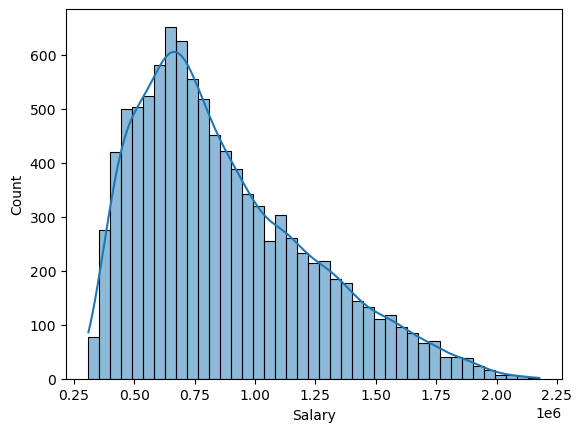

In [50]:
sns.histplot(df['Salary'],kde=True)
plt.show()

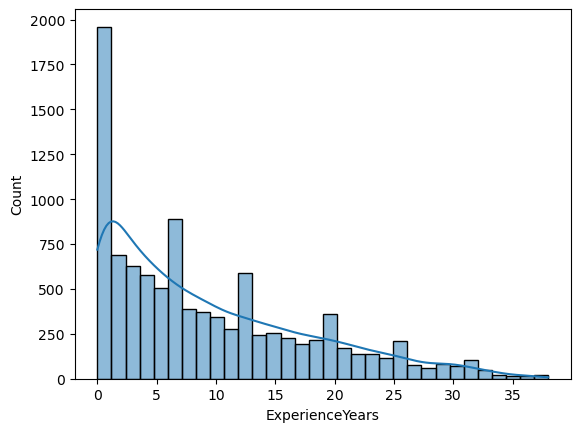

In [51]:
sns.histplot(df['ExperienceYears'],kde=True)
plt.show()

In [52]:
df.isnull().sum()    #There is no missing values

Education            0
JobRole              0
Department           0
ExperienceYears      0
PerformanceRating    0
CityTier             0
Salary               0
dtype: int64

In [53]:
df.duplicated().sum()    #There is no duplicate values

0

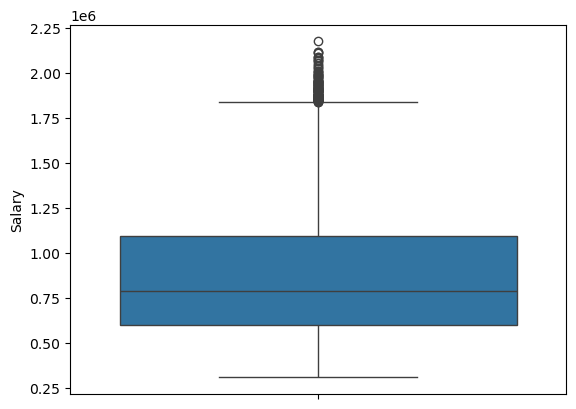

In [54]:
sns.boxplot(df['Salary'])   #There is outliers but retrain them
plt.show()

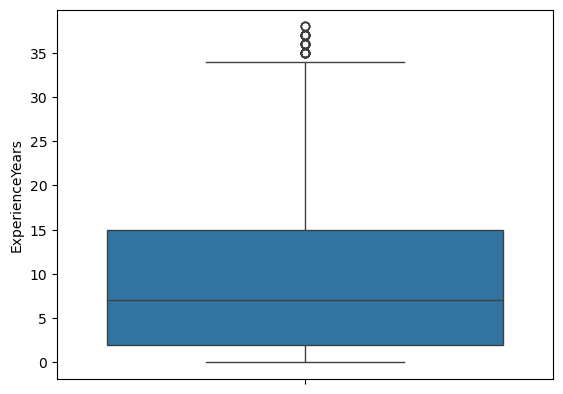

In [55]:
sns.boxplot(df['ExperienceYears'])    #There is outliers but retrain them
plt.show()

# Step4: Data Wrangling

**Data Encoding**

In [58]:
#encoding educational column
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[["Master", 'PhD', "Bachelor"]])
df["Education"]=oe.fit_transform(df[['Education']]).astype('int')
df["Education"]

0       0
1       1
2       2
3       2
4       1
       ..
9995    1
9996    1
9997    0
9998    1
9999    2
Name: Education, Length: 10000, dtype: int32

In [59]:
dummy_columns=pd.get_dummies(df['JobRole'],dtype=int,drop_first=True)
merged=pd.concat([df,dummy_columns],axis='columns')
merged
dummy_columns=pd.get_dummies(merged['Department'],dtype=int,drop_first=True)
merged1=pd.concat([merged,dummy_columns],axis='columns')
merged1
dffinal=merged1.drop(['JobRole','Department'],axis=1)
dffinal

,Education,ExperienceYears,PerformanceRating,CityTier,Salary,Data Analyst,Data Scientist,Director,HR Executive,HR Manager,Product Manager,Research Lead,Sales Executive,Software Engineer,HR,IT,Management,Product,R&D,Sales
0,0,9,4,2,1010139,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,5,2,512708,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,2,6,2,1,756347,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,2,8,4,1,680273,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,6,3,3,895727,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,2,4,1,539836,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9996,1,21,4,1,1321201,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9997,0,0,4,3,631012,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9998,1,22,5,2,1352360,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Step5 : X and y

In [61]:
X=dffinal.drop('Salary',axis=1)
y=df['Salary']
#X = pd.get_dummies(df.drop('Salary', axis=1), drop_first=True)
#y = df['Salary']
#raining_columns = X.columns.tolist()

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Step6 : Modeling

In [64]:
# for train data
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [65]:
print("Intercept:",model.intercept_)
print("Coeficent:",model.coef_)

Intercept: 373060.39857833565
Coeficent: [-2.53906145e+04  4.00652456e+04  2.03635292e+04  1.74312978e+02
 -1.53820031e+03 -1.06991949e+02  1.99399726e+05  1.43696798e+03
  1.97763692e+05  2.00377855e+05  1.96565412e+05  1.68031842e+03
 -1.90142528e+03  1.49911219e+03  6.90275885e+02  3.21496923e+02
  7.82190168e+02  2.46265748e+03  8.34175125e+02]


In [66]:
ypred_train=model.predict(X_train)
ypred_train

array([1344340.05611909,  737202.95460023,  767009.30288623, ...,
        431843.12113626,  925318.92246916,  955865.30506931])

**Cross validation for Train data**


In [68]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
print("r2 score:",r2_score(y_train,ypred_train))
print("cross val score:",cross_val_score(model,X_train,y_train,cv=5).mean())

r2 score: 0.9883062707004562
cross val score: 0.9882264360392281


In [69]:
ypred_test=model.predict(X_test)
ypred_test

array([ 456963.0956511 , 1396408.69314335,  682813.39433924, ...,
       1503106.11743609,  875123.11584312,  568667.90533843])

**Cross validation for Train data**

In [71]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
print("r2 score:",r2_score(y_test,ypred_test))
print("cross val score:",cross_val_score(model,X_test,y_test,cv=5).mean())

r2 score: 0.9874118233491332
cross val score: 0.9873267227640881


# Step7 : Model Selection

- Condition1: Train==cv(satisfied).
- Condition2: Train==Test(satisfied).
- Condition3: Business problem(satisfied).
- ONLY for LINEAR REGRESSION --->Assumptions must be satisfied

# Step7 : Predict Future Data

In [75]:
new_employee_dict={'Education':['PhD'],
      'ExperienceYears':[0],
      'PerformanceRating':[3],
      'JobRole':['Director'],
      'Department':['IT'],
      'CityTier':[2]}

In [76]:
new_employee = pd.DataFrame(new_employee_dict)
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[["Master", 'PhD', "Bachelor"]])
new_employee["Education"]=oe.fit_transform(new_employee[['Education']]).astype('int')
new_employee["Education"]

0    1
Name: Education, dtype: int32

In [77]:
combined=pd.concat([df.drop('Salary',axis=1),new_employee],ignore_index=True)
data_encoded=pd.get_dummies(df,columns=['JobRole','Department'],drop_first=True)
new_employee=new_employee.reindex(columns=X.columns, fill_value=0)
model.predict(new_employee)

array([409108.99763908])

In [78]:
new_employee_dict1={'Education':['Master'],
      'ExperienceYears':[5],
      'PerformanceRating':[5],
      'JobRole':['Data Scientist'],
      'Department':['IT'],
      'CityTier':[2]}

In [79]:
new_employee1 = pd.DataFrame(new_employee_dict1)
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[["Master", 'PhD', "Bachelor"]])
new_employee1["Education"]=oe.fit_transform(new_employee1[['Education']]).astype('int')
new_employee1["Education"]

0    0
Name: Education, dtype: int32

In [80]:
combined=pd.concat([df.drop('Salary',axis=1),new_employee1],ignore_index=True)
data_encoded=pd.get_dummies(df,columns=['Education','JobRole','Department'],drop_first=True)
new_employee1=new_employee1.reindex(columns=X.columns, fill_value=0)
model.predict(new_employee1)

array([675552.89823299])

In [81]:
new_employee_dict2={'Education':['Master'],
      'ExperienceYears':[3],
      'PerformanceRating':[4],
      'JobRole':['Product Manager'],
      'Department':['Sales'],
      'CityTier':[1]}

In [82]:
new_employee2 = pd.DataFrame(new_employee_dict2)
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[["Master", 'PhD', "Bachelor"]])
new_employee2["Education"]=oe.fit_transform(new_employee2[['Education']]).astype('int')
new_employee2["Education"]

0    0
Name: Education, dtype: int32

In [83]:
combined=pd.concat([df.drop('Salary',axis=1),new_employee2],ignore_index=True)
data_encoded=pd.get_dummies(df,columns=['Education','JobRole','Department'],drop_first=True)
new_employee2=new_employee2.reindex(columns=X.columns, fill_value=0)
model.predict(new_employee2)

array([574884.56496514])

# Step8 : Save The Model

In [85]:
from joblib import dump
dump(model,'slr_model.joblib')

['slr_model.joblib']

In [86]:
pwd

'C:\\Users\\Asus'